In [2]:
import datetime
from resnet18 import *
from utils import *
setup_seed(6666)


train_loader = load_data()
iter_val_loader = load_data(train=False, n_items=512)
epoch_val_loader, test_loader = load_data(train=False)

net = ResNet18GAP().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

start_time = datetime.datetime.now()
for epoch in range(32):
    acc = train_model(epoch, (train_loader, iter_val_loader, epoch_val_loader), (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
print('Training time:%d' % (end_time - start_time).seconds)

0	0	loss: 2.554762840270996	lr: 0.10000
train acc: 0.06250	 validation acc: 0.11523
0	50	loss: 2.0245227813720703	lr: 0.10000
train acc: 0.25000	 validation acc: 0.21289
0	100	loss: 1.7037856578826904	lr: 0.10000
train acc: 0.28125	 validation acc: 0.27539
0	150	loss: 1.7174278497695923	lr: 0.10000
train acc: 0.34375	 validation acc: 0.32227
0	200	loss: 1.746796727180481	lr: 0.10000
train acc: 0.30469	 validation acc: 0.39844
0	250	loss: 1.772922396659851	lr: 0.10000
train acc: 0.34375	 validation acc: 0.43945
0	300	loss: 1.5585445165634155	lr: 0.10000
train acc: 0.36719	 validation acc: 0.40625
0	350	loss: 1.5152592658996582	lr: 0.10000
train acc: 0.42969	 validation acc: 0.43945
epoch:   0	epoch acc: 0.454296875
1	0	loss: 1.4983854293823242	lr: 0.10000
train acc: 0.48438	 validation acc: 0.48633
1	50	loss: 1.5063304901123047	lr: 0.10000
train acc: 0.39062	 validation acc: 0.48828
1	100	loss: 1.3013718128204346	lr: 0.10000
train acc: 0.55469	 validation acc: 0.44336
1	150	loss: 1.3479

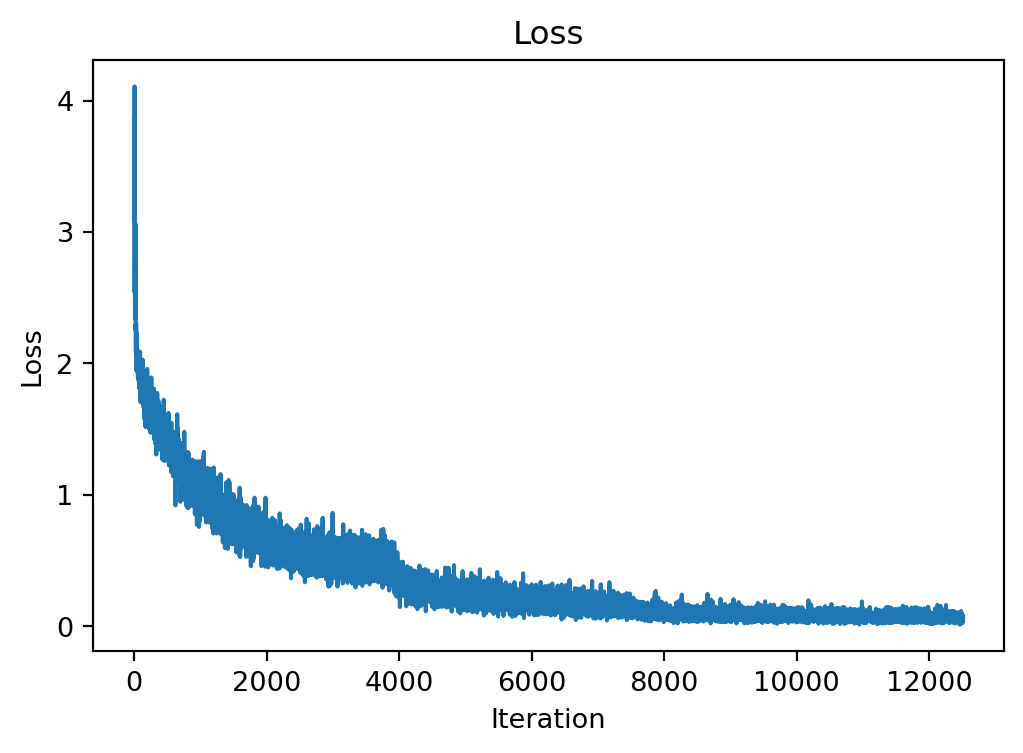

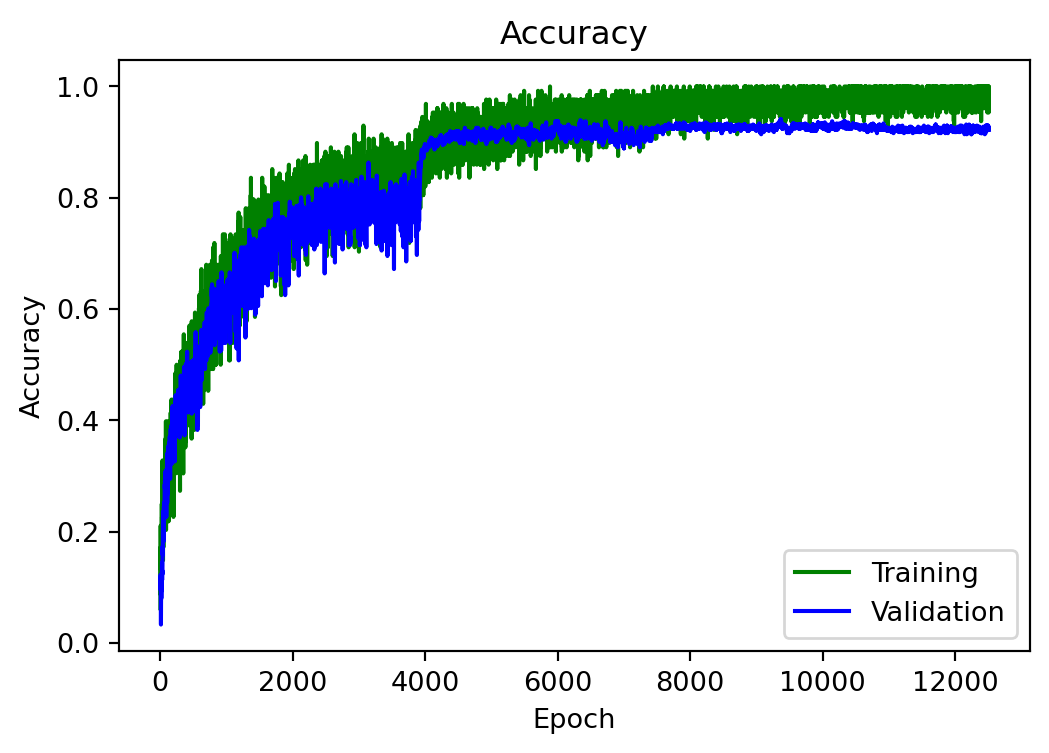

ILV: {'loss': 0.019327470593493264, 'train': 0.002523362720418949, 'val': 0.0015038272266346337}
EFR: {'loss': 0.02795196235132623, 'train': 0.021630138835379713, 'val': 0.007488632061809577}


In [3]:
draw_loss(loss_list)
draw_acc(train_err, val_err)

loss_list = [i.item() for i in loss_list]
ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
print(f'ILV: {ILV}')
print(f'EFR: {EFR}')

In [12]:
torch.save(loss_list, './output-GAP/loss_list')
torch.save(train_err, './output-resnet-fixed-lr/train_err')
torch.save(val_err, './output-resnet-fixed-lr/val_err')
torch.save(net.state_dict(), './output-resnet-fixed-lr/param.pth')

In [4]:
acc = get_val_acc(net, epoch_val_loader)
print(f"Test accuracy: {acc}")

Test accuracy: 0.9118489583333333
